In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [2]:
# Load the heart disease dataset
df = pd.read_csv('/content/heart_disease_uci.csv')

# Show first few rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Check null values
print(df.isnull().sum())

# Check dataset info
df.info()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 1

In [5]:
# Drop columns with too many missing values
df = df.drop(columns=['ca', 'thal'])

# Drop rows with remaining missing values
df = df.dropna()

# Convert categorical columns to category type
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope']
df[categorical_cols] = df[categorical_cols].astype('category')

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert 'num' to binary: 0 = no disease, 1 = disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns
df = df.drop(columns=['id', 'num'])

# Check final dataset
df.head()


,age,trestbps,chol,thalch,oldpeak,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,target
0,63,145.0,233.0,150.0,2.3,True,False,False,False,False,False,True,True,False,False,False,False,False,0
1,67,160.0,286.0,108.0,1.5,True,False,False,False,False,False,False,False,False,False,True,True,False,1
2,67,120.0,229.0,129.0,2.6,True,False,False,False,False,False,False,False,False,False,True,True,False,1
3,37,130.0,250.0,187.0,3.5,True,False,False,False,False,True,False,False,True,False,False,False,False,0
4,41,130.0,204.0,172.0,1.4,False,False,False,False,True,False,False,False,False,False,False,False,True,0


In [6]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dimensions
print("Training Set:", X_train.shape)
print("Test Set:", X_test.shape)


Training Set: (424, 18)
Test Set: (107, 18)


In [7]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


Accuracy: 0.822429906542056


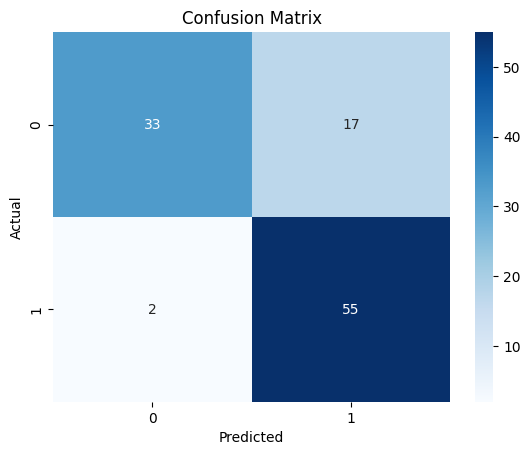

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


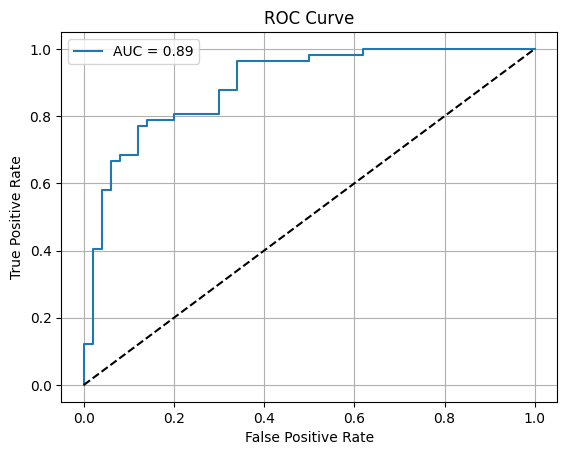

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities for ROC
y_probs = model.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


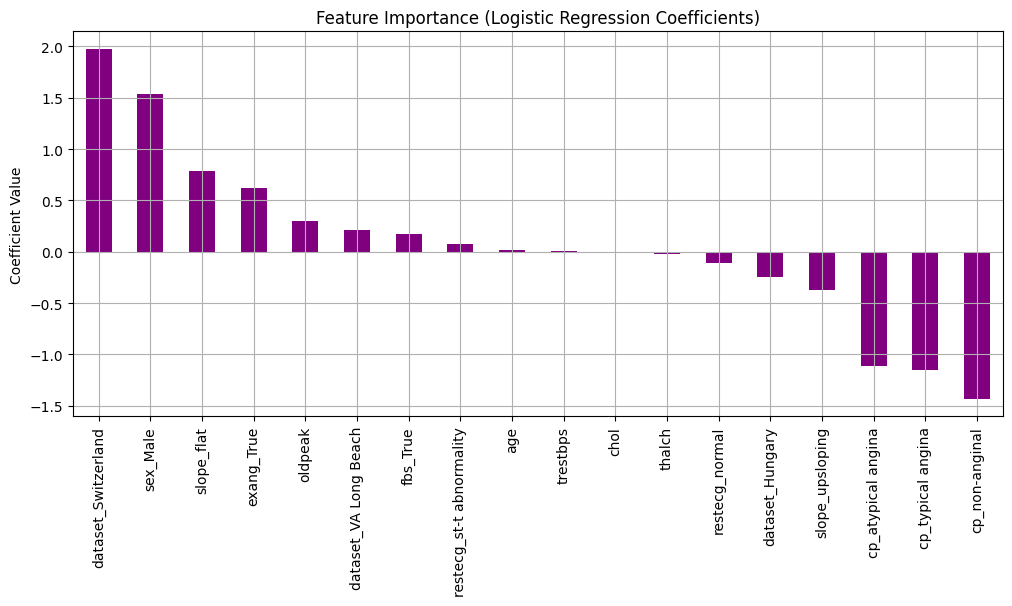

In [10]:
# Create a pandas Series of feature importances
importance = pd.Series(model.coef_[0], index=X.columns)

# Plot top features
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), color='purple')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()
